In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [4]:
###Training Set###

#Read the complete DataSet
df_train=pd.read_csv('2B_Training.csv')
print('Training Data Set:\n',df_train.head())

#Separate out training Features as a dataframe: 09V-44V,Coulombs
df_xtrain = df_train.iloc[:,8:45]
print('df_xtrain:\n',df_xtrain.head())

#convert features to a numpy array
xtrain=df_xtrain.values

#Reshape the array: no of samples x no of features
n_samples = len(df_xtrain.index)
n_features = len(df_xtrain.columns)
xtrain.reshape(n_samples,n_features)
print('xtrain: \n',xtrain)

#Separate out targets from the training set App_Amps
df_ytrain = df_train['App_Amps']
print('df_ytrain:\n',df_ytrain.head())

#convert targets to a numpy array
ytrain=df_ytrain.values

#Rehsape array: samples x targets
n_targets = 1
#n_targets = len(df_ytrain.columns)
ytrain.reshape(n_samples,n_targets)
print('ytrain:\n',ytrain)

### Validation Data Set ###

#Read in the complete test dataset
df_test=pd.read_csv('2B_Validation.csv')
print('Validation Data Set:\n',df_test.head())

#Separate out features as a dataframe 09V-44V,Coulombs
df_xtest=df_test.iloc[:,8:45]
print('df_xtest:\n',df_xtest.head())

#convert to a numpy array
xtest=df_xtest.values

#reshape array: Samples x Features
n_testsamples = len(df_xtest.index)
xtest.reshape(n_testsamples,n_features)
print('xtest:\n',xtest)

#separate out the targets from validation dataset App_Amps
df_ytest = df_test['App_Amps']
print('df_ytest:\n',df_ytest.head())

#convert targets to a numpy array
ytest=df_ytest.values

#Rehsape array: samples x targets
ytest.reshape(n_testsamples,n_targets)
print('ytest:\n',ytest)


Training Data Set:
    01V  02V  03V  04V  05V  06V  07V  08V  09V  10V  ...  37V  38V  39V  40V  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0   86   86  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0  176  176  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0  240  240  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0  240  240  ...    0    0    0    0   

   41V  42V  43V  44V  Coulombs  App_Amps  
0    0    0    0    0         0         0  
1    0    0    0    0       118        59  
2    0    0    0    0       388       135  
3    0    0    0    0       786       199  
4    0    0    0    0      1202       208  

[5 rows x 46 columns]
df_xtrain:
    09V  10V  11V  12V  13V  14V  15V  16V  17V  18V  ...  36V  37V  38V  39V  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1   86   86   86   86    0    0    0    

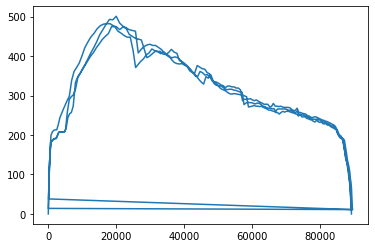

In [8]:
plt.plot(df_xtrain['Coulombs'],ytrain,label='Amps_Train')
plt.show()

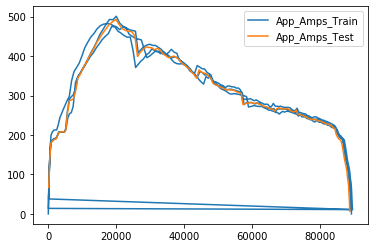

In [9]:
for i in range(n_targets):
    plt.plot(df_xtrain['Coulombs'],ytrain,label='App_Amps_Train')
    plt.plot(df_xtest['Coulombs'],ytest,label='App_Amps_Test')
    plt.legend()
    plt.show()

#plt.plot(df_Ytrain,df_Xtrain['V3'],label='Train')

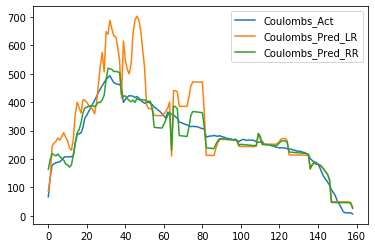

MAE LR: 57.07547784001572
MAE RR: 23.45221298109767
Total error LR: -6251.50927734375
Total error RR: 65.47354193640058


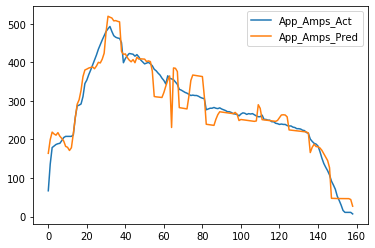

In [24]:
reg = linear_model.LinearRegression()
ridge = linear_model.Ridge(alpha=0.25)

time=range(0,n_testsamples,1)

degree=1
poly = PolynomialFeatures(degree)
xtrain_lr = poly.fit_transform(xtrain)#.make_pipeline(PolynomialFeatures(degree),reg)
model_lr = reg.fit(xtrain_lr,ytrain)

xtest_lr = poly.fit_transform(xtest)
ypred_lr = model_lr.predict(xtest_lr)

model_rr= ridge.fit(xtrain, ytrain)
ypred_rr = model_rr.predict(xtest)

ytest_columbs=ytest.sum
ypred_rr_columbs=ypred_rr.sum
ypred_lr_columbs=ypred_lr.sum

#total_error_rr= (ytest_columbs-ypred_rr_columbs)
#total_error_lr= (ytest_columbs-ypred_lr_columbs)
#r2=r2_score
#print('Total error rr:',total_error_rr)
#print('Total error lr:',total_error_lr)
plt.plot(time,ytest,label='Coulombs_Act')
plt.plot(time,ypred_lr,label='Coulombs_Pred_LR')
plt.plot(time,ypred_rr,label='Coulombs_Pred_RR')
plt.legend()
plt.show()

    
for i in range(n_targets):
    ground_truth = ytest#[:,i]
    predict_lr = ypred_lr#[:,i]
    predict_rr = ypred_rr#[:,i]
    MAE_lr = mean_absolute_error(ground_truth,predict_lr)
    MAE_rr = mean_absolute_error(ground_truth,predict_rr)
    total_error_lr=ground_truth.sum() - predict_lr.sum()
    total_error_rr=ground_truth.sum() - predict_rr.sum()
    #r2=r2_score
    print('MAE LR:',MAE_lr)
    print('MAE RR:',MAE_rr)
    print('Total error LR:',total_error_lr)
    print('Total error RR:',total_error_rr)
    plt.plot(time,ground_truth,label='App_Amps_Act')
    plt.plot(time,predict_rr,label='App_Amps_Pred')
    plt.legend()
    plt.show()

